In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

In [3]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
cifar10 = tf.keras.datasets.cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape

170500096/170498071 [==============================] - 407s 2us/step


((50000, 32, 32, 3), (50000, 1))

#### test data is in 2D. we need to flatten them

In [7]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
y_train.shape

(50000,)

In [9]:
# look the first image
print(f"shape: {X_train[0].shape}, dimension: {X_train[0].ndim}")

shape: (32, 32, 3), dimension: 3


In [10]:
# number of classes
K = len(np.unique(y_train))
print(f"number of classes: {K}")

number of classes: 10


#### classes

|label|description|
|:--:|:---|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat |
|4|deer |
|5|dog |
|6|frog |
|7|horse |
|8|ship |
|9|truck|

In [11]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 1.5963 - accuracy: 0.4149 - val_loss: 1.2921 - val_accuracy: 0.5381
Epoch 2/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.2863 - accuracy: 0.5366 - val_loss: 1.1323 - val_accuracy: 0.5949
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.1618 - accuracy: 0.5860 - val_loss: 1.0702 - val_accuracy: 0.6255
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0798 - accuracy: 0.6158 - val_loss: 0.9892 - val_accuracy: 0.6494
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0107 - accuracy: 0.6407 - val_loss: 0.9723 - val_accuracy: 0.6575
Epoch 6/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.9517 - accuracy: 0.6633 - val_loss: 0.9194 - val_accuracy: 0.6773
Epoch 7/10
50000/50000 [==============================]

In [13]:
r.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336

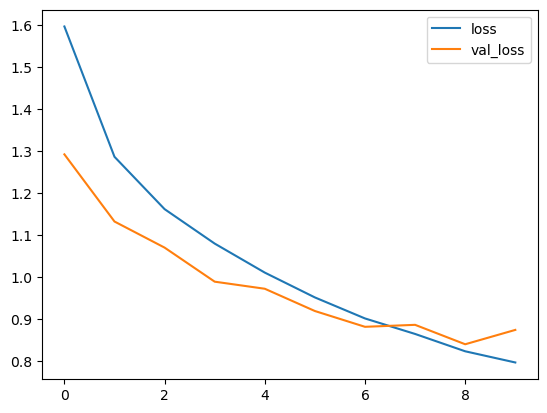

In [14]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

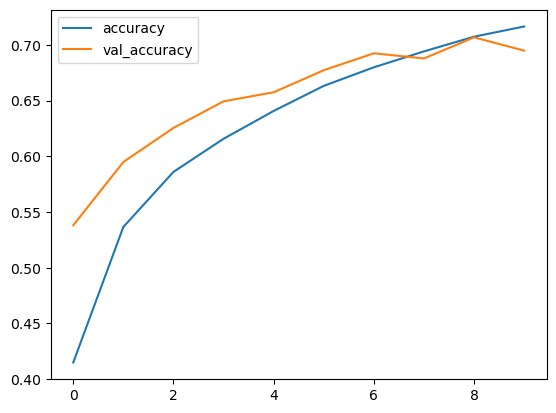

In [15]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();